<a href="https://colab.research.google.com/github/Ruthmwaura/group_6_project/blob/main/Copy_of_Life_Expectancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Life Expectancy

## Imports

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
from scipy import stats
from statsmodels.stats.weightstats import ztest as ztest
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
import os
import warnings


warnings.filterwarnings('ignore')
%matplotlib inline

## Dataset Loading

In [ ]:
# Mounting Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Accessing the working directory
os.chdir('/content/drive/My Drive/Core/Moringa Core Project 1')

In [ ]:
# Loading dataset
expectancy = pd.read_csv('Life Expectancy Data.csv')

## Dataset Preview

In [ ]:
# First five rows
expectancy.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
# Tail section
expectancy.tail()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,...,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


In [ ]:
# Dataset information summary
expectancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

**Missing Values**

In [ ]:
# Missing values
expectancy.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

From a survery of the available datasets, the missing values seem not to be present in the WorldBank and WHO datasets.

Temporary dataset

In [ ]:
# Grouping by continent

# Loading dataset
continents = pd.read_html('https://github.com/dbouquin/IS_608/blob/master/NanosatDB_munging/Countries-Continents.csv')
continents = continents[0]
# Dataset preview
continents.head()

,Unnamed: 0,Continent,Country
0,NaN,Africa,Algeria
1,NaN,Africa,Angola
2,NaN,Africa,Benin
3,NaN,Africa,Botswana
4,NaN,Africa,Burkina


In [ ]:
# Removing unnecessary column
continents.drop('Unnamed: 0', axis = 1, inplace = True)

In [ ]:
# Confirming changes and checking information
continents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Continent  194 non-null    object
 1   Country    194 non-null    object
dtypes: object(2)
memory usage: 3.2+ KB


In [ ]:
# Copy of the dataset
hypothesis1 = expectancy.copy()

In [ ]:
# 7 continents
continents.Continent.unique()

array(['Africa', 'Asia', 'Europe', 'North America', 'Oceania',
       'South America'], dtype=object)

In [ ]:
# List of countries in each continent
africa = list(continents[continents['Continent'] == 'Africa']['Country'])
asia = list(continents[continents['Continent'] == 'Asia']['Country'])
europe = list(continents[continents['Continent'] == 'Europe']['Country'])
oceania = list(continents[continents['Continent'] == 'Oceania']['Country'])
north_america = list(continents[continents['Continent'] == 'North America']['Country'])
south_america = list(continents[continents['Continent'] == 'South America']['Country'])
continents = [africa, asia, europe, oceania, north_america, south_america]

In [ ]:
# Adding a continent column
hypothesis1['Continent'] = ''

In [ ]:
# Target list
conts = ['Africa', 'Asia', 'Europe', 'Oceania', 'North America', 'South America']

In [ ]:
# Assigning continent to each family
def Continents(continents, source, target, list, data):
  for i, continent in enumerate(continents):
    data.loc[(data[source].apply(lambda x: x in continent)), [target]]= list[i]

In [ ]:
# Function call
Continents(continents, 'Country', 'Continent', conts, hypothesis1)

In [ ]:
# Confirming changes
hypothesis1['Continent'].unique()

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania', ''], dtype=object)

In [ ]:
# Checking error
hypothesis1[hypothesis1['Continent'].isnull()]['Country'].unique()

array([], dtype=object)

In [ ]:
# Renaming country columns
hypothesis1['Country'].replace({'Bolivia (Plurinational State of)': 'Bolivia',
                               'Brunei Darussalam': 'Brunei', 
                               "Democratic People's Republic of Korea": 'North Korea',
                               'Iran (Islamic Republic of)': 'Iran',
                               "Lao People's Democratic Republic": 'Laos',
                               'Micronesia (Federated States of)': 'Micronesia',
                               'Republic of Korea': 'South Korea', 'Republic of Moldova':
                               'Maldova', 'Syrian Arab Republic': 'Syria',
                               'The former Yugoslav republic of Macedonia': 'North Macedonia',
                              'United Kingdom of Great Britain and Northern Ireland':
                               'United Kingdom', 'United Republic of Tanzania': 'Tanzania',
                               'Venezuela (Bolivarian Republic of)':'Venezuela',
                               'Viet Nam': 'Vietnam'}, inplace = True)

In [ ]:
# Variables used to assign continents
africa2 = ['Burkina Faso', 'Côte d\'Ivoire', 'Cabo Verde', 'Democratic Republic of the Congo', 'Tanzania' ]
asia2 = ['Brunei', 'North Korea', 'Laos', 'Myanmar', 'South Korea', 'Timor-Leste', 'Vietnam', 'Iran', 'Syria']
europe2 = ['Czechia', 'Maldova', 'North Macedonia', 'United Kingdom']
north_america2 = ['United States of America']
south_america2 = ['Bolivia', 'Venezuela']
oceania2 = ['Cook Islands', 'Micronesia', 'Niue']
continents2 = [africa2, asia2, europe2, oceania2, north_america2, south_america2]

In [ ]:
# Implementaion
# Function call
Continents(continents2, 'Country', 'Continent', conts, hypothesis1)

In [ ]:
# Confirmimg changes
hypothesis1['Continent'].unique()

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

In [ ]:
# Confirmimg changes
hypothesis1[hypothesis1['Continent'].isnull()].any().any()

False

In [ ]:
hypothesis1.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Continent'],
      dtype='object')

**Clusters**

The selected continents for the study are North America, Europe, Asia and Africa.

In [ ]:
# Selecting required continents
clusters = ['North America', 'Europe', 'Asia', 'Africa']
hypothesis1 = hypothesis1.loc[(hypothesis1['Continent'].apply(lambda x: x in clusters))]

In [ ]:
# Checking missing values
hypothesis1.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      4
Adult Mortality                      4
infant deaths                        0
Alcohol                            172
percentage expenditure               0
Hepatitis B                        532
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  204
Diphtheria                          19
 HIV/AIDS                            0
GDP                                397
Population                         584
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    162
Schooling                          161
Continent                            0
dtype: int64

In [ ]:
# The population and GDP cannot be imputed as they differ per country
hypothesis1.drop(['Hepatitis B','GDP','Population'], axis = 1, inplace = True)

In [ ]:
# Grouped mean by country
means = hypothesis1.groupby('Country').mean()
# Reseting the index to obtain the country column
means.reset_index(inplace = True)

In [ ]:
# Null values in the means data frame
means.isnull().sum()

Country                             0
Year                                0
Life expectancy                     4
Adult Mortality                     4
infant deaths                       0
Alcohol                             1
percentage expenditure              0
Measles                             0
 BMI                                4
under-five deaths                   0
Polio                               0
Total expenditure                   2
Diphtheria                          0
 HIV/AIDS                           0
 thinness  1-19 years               4
 thinness 5-9 years                 4
Income composition of resources    12
Schooling                          11
dtype: int64

In [ ]:
# Columns
cols = list(hypothesis1.columns)
columns = [cols[3], cols[4], cols[6], cols[8], cols[10], cols[12], cols[13],
           cols[14], cols[16], cols[17], cols[18], cols[19]]


In [ ]:
# Imputing mean
for column in columns:
  countries = list(hypothesis1[hypothesis1[column].isnull()].Country.unique())
  for country in countries:
    # hypothesis1.loc[(hypothesis1.Alcohol.isnull()) & (hypothesis1.Country == country)] = means.loc[means.Country == country, 'Alcohol'].at[means.index[-1]]
    hypothesis1.loc[(hypothesis1[column].isnull()) & (hypothesis1.Country == country), column] = means.loc[means.Country == country, column].values[0]

In [ ]:
# Checking changes
hypothesis1.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      4
Adult Mortality                      4
infant deaths                        0
Alcohol                             16
percentage expenditure               0
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                   32
Diphtheria                           0
 HIV/AIDS                            0
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    162
Schooling                          161
Continent                            0
dtype: int64

In [ ]:
# Percentage of missing values
percentage = hypothesis1.isnull().sum() * 100 / len(hypothesis1)
percentage

Country                            0.000000
Year                               0.000000
Status                             0.000000
Life expectancy                    0.155039
Adult Mortality                    0.155039
infant deaths                      0.000000
Alcohol                            0.620155
percentage expenditure             0.000000
Measles                            0.000000
 BMI                               1.317829
under-five deaths                  0.000000
Polio                              0.736434
Total expenditure                  1.240310
Diphtheria                         0.000000
 HIV/AIDS                          0.000000
 thinness  1-19 years              1.317829
 thinness 5-9 years                1.317829
Income composition of resources    6.279070
Schooling                          6.240310
Continent                          0.000000
dtype: float64

In [ ]:
# Grouped mean by continent
means2 = hypothesis1.groupby('Continent').mean()
# Reseting the index to obtain the country column
means2.reset_index(inplace = True)

In [ ]:
# There are no missing values
means2.isnull().sum()

Continent                          0
Year                               0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [ ]:
# Checking changes
means2.head()

,Continent,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Africa,2007.500000,58.611921,266.571759,44.246528,2.652050,108.679071,4102.025463,23.172356,67.796296,71.017585,5.338465,69.743056,5.425347,7.258173,7.186779,0.462597,9.211625
1,Asia,2007.500000,70.831818,138.511364,65.217330,2.060353,472.252479,4536.762784,33.027699,83.892045,85.900285,4.680442,86.074472,0.162216,7.675284,7.931960,0.637988,11.744196
2,Europe,2007.516320,77.365625,95.227679,0.888724,9.053339,1981.092616,471.762611,52.245685,1.068249,92.758982,7.173950,92.135015,0.110386,1.616369,1.626488,0.796380,14.946080
3,North America,2007.532544,73.778869,126.119048,5.621302,6.084657,536.289184,17.363905,45.005030,6.872781,85.500000,6.762690,87.624260,0.465089,2.817456,2.777219,0.657140,12.430745


In [ ]:
# Filling by continent means
for column in columns:
  continents = list(hypothesis1[hypothesis1[column].isnull()].Continent.unique())
  for continent in continents:
    # hypothesis1.loc[(hypothesis1.Alcohol.isnull()) & (hypothesis1.Country == country)] = means.loc[means.Country == country, 'Alcohol'].at[means.index[-1]]
    hypothesis1.loc[((hypothesis1[column].isnull()) & (hypothesis1.Continent == continent)), column] = means2.loc[means2.Continent == continent, column].values[0]

In [ ]:
# Checking changes
hypothesis1.isnull().sum()

Country                             0
Year                                0
Status                              0
Life expectancy                     0
Adult Mortality                     0
infant deaths                       0
Alcohol                             0
percentage expenditure              0
Measles                             0
 BMI                               34
under-five deaths                   0
Polio                              19
Total expenditure                   0
Diphtheria                          0
 HIV/AIDS                           0
 thinness  1-19 years              34
 thinness 5-9 years                 0
Income composition of resources     0
Schooling                           0
Continent                           0
dtype: int64

In [ ]:
# Checking errors
hypothesis1[hypothesis1[' BMI '].isnull()].head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Continent
1715,Monaco,2013,Developing,77.365625,95.227679,0,0.01000,0.000000,0,NaN,0,99.0,4.30,99.0,0.1,NaN,1.626488,0.79638,14.94608,Europe
2216,San Marino,2013,Developing,77.365625,95.227679,0,0.01000,0.000000,0,NaN,0,69.0,6.50,69.0,0.1,NaN,1.626488,0.79638,15.10000,Europe
2409,South Sudan,2015,Developing,57.300000,332.000000,26,2.65205,0.000000,878,NaN,39,41.0,2.71,31.0,3.4,NaN,7.186779,0.42100,4.90000,Africa
2410,South Sudan,2014,Developing,56.600000,343.000000,26,2.65205,46.074469,441,NaN,39,44.0,2.74,39.0,3.5,NaN,7.186779,0.42100,4.90000,Africa
2411,South Sudan,2013,Developing,56.400000,345.000000,26,2.65205,47.444530,525,NaN,40,5.0,2.62,45.0,3.6,NaN,7.186779,0.41700,4.90000,Africa


In [ ]:
hypothesis1.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Measles ',
       ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Continent'],
      dtype='object')

In [ ]:
# Retrying
targets_columns = [' BMI ', 'Polio', ' thinness  1-19 years'] 
# Filling by continent means
for column in targets_columns:
  continents = list(hypothesis1[hypothesis1[column].isnull()].Continent.unique())
  for continent in continents:
    # hypothesis1.loc[(hypothesis1.Alcohol.isnull()) & (hypothesis1.Country == country)] = means.loc[means.Country == country, 'Alcohol'].at[means.index[-1]]
    hypothesis1.loc[((hypothesis1[column].isnull()) & (hypothesis1.Continent == continent)), column] = means2.loc[means2.Continent == continent, column].values[0]

In [ ]:
# Confirming changes
hypothesis1.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
Continent                          0
dtype: int64

In [ ]:
# Convert to csv
hypothesis1.to_csv('Life_Expectancy.csv')

### Bivariate Analysis

In [ ]:
# Categorizing by continent

#### Categorical-Categorical

In [ ]:
# Function used to generate a crosstab before plotting a stacked bar chart.
def CrosstabPlot(x, y, data):  
  table = pd.crosstab(data[x], data[y])
  table.plot.bar(stacked = True, figsize = (30,5))
  plt.title(f'{x} Vs {y}', y = 1.05, fontsize = 12)
  plt.xticks(rotation = 0)
  plt.xlabel(x, fontsize = 10)
  plt.ylabel(y, fontsize = 10)

In [ ]:
# Categoical columns
categorical = list(expectancy.select_dtypes(include = 'object').columns)
categorical

['Country', 'Status']

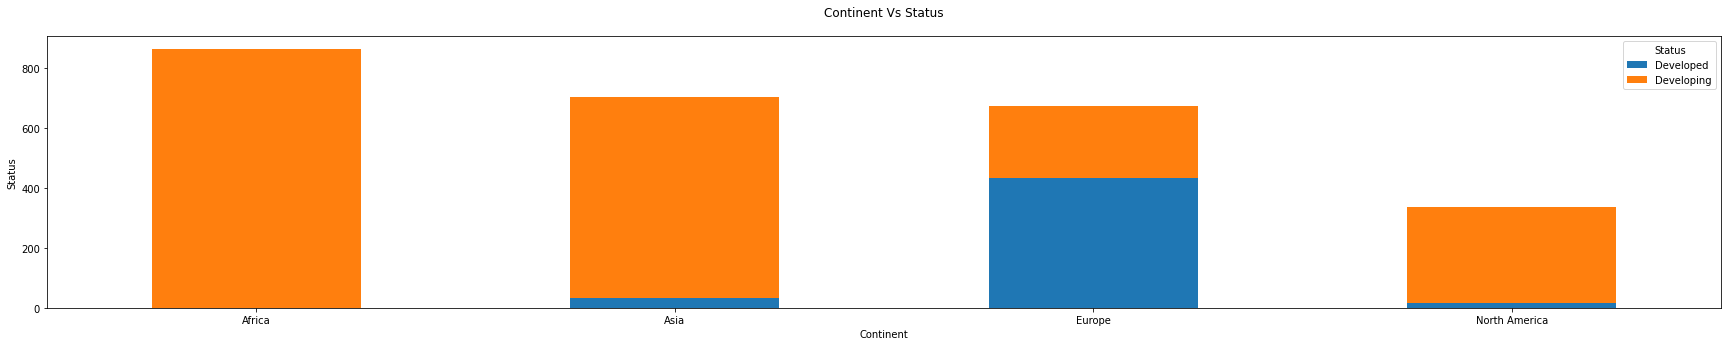

In [ ]:
# Continent Vs Status
CrosstabPlot('Continent', 'Status', hypothesis1)

* Africa and South America are developing continents.
* Europe has the highest number of developed countires.

#### Numerical-Numerical

In [ ]:
# Numerical-numerical plots
def LineScatterPlots(x, y, data):
  fig, ax = plt.subplots(1,2, figsize = (15, 5))
  sns.scatterplot(data[x], data[y], ax = ax[0], color = 'green')
  ax[0].set_title(f'Scatter Plot: {x} - {y}', y = 1.05)
  sns.lineplot(data[x], data[y], ax = ax[1], color = 'purple')
  ax[1].set_title(f'Line Plot: {x} - {y}', y = 1.05)
  plt.show()

In [ ]:
# Pearson Correlation
def Corr(x,y,data):
  corr = data[[x,y]].corr()
  print(f'Correlation Matrix : \n{corr}')

In [ ]:
# Numeric columns
numeric = list(hypothesis1.select_dtypes(exclude = 'object').columns)
numeric

['Year',
 'Life expectancy ',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

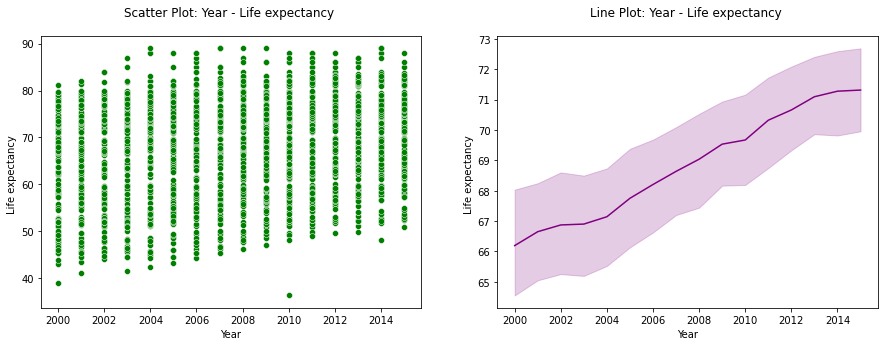

In [ ]:
# Life expectancy Vs Year
LineScatterPlots(numeric[0], numeric[1], hypothesis1)

Life expectancy increases progressively each year.

In [ ]:
# Correlation
Corr(numeric[0], numeric[1], hypothesis1)

Correlation Matrix : 
                      Year  Life expectancy 
Year              1.000000          0.173749
Life expectancy   0.173749          1.000000


There is a very week positve correlation between the two.

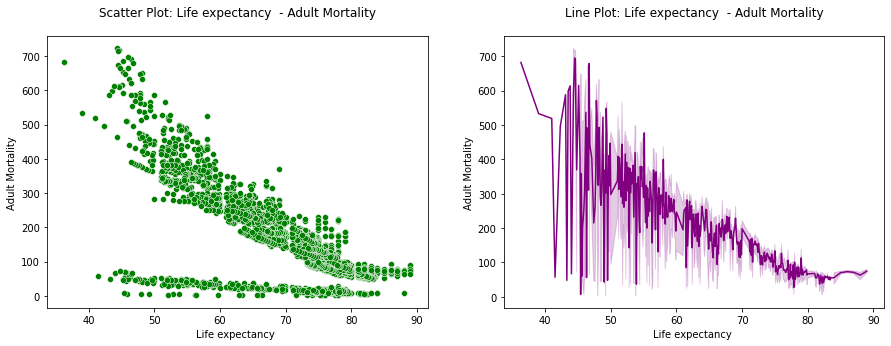

In [ ]:
# Life Expectancy Vs Adult Mortality
LineScatterPlots(numeric[1], numeric[2], hypothesis1)

Adult mortality decreases with increase in life expectancy.

In [ ]:
# Correlation
Corr(numeric[1], numeric[2], hypothesis1)

Correlation Matrix : 
                  Life expectancy   Adult Mortality
Life expectancy           1.000000        -0.701742
Adult Mortality          -0.701742         1.000000


There is strong negative correlation between the two columns.

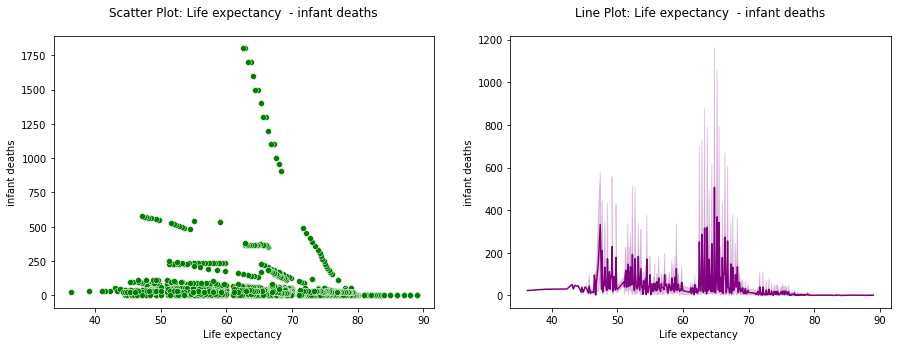

In [ ]:
# Life Expectancy Vs Infant Deaths
LineScatterPlots(numeric[1], numeric[3], hypothesis1)

Life expectancy seems to have no correlation to the number of infant deaths.

In [ ]:
# Correlation
Corr(numeric[1], numeric[3], hypothesis1)

Correlation Matrix : 
                  Life expectancy   infant deaths
Life expectancy           1.000000      -0.193897
infant deaths            -0.193897       1.000000


Weak negative correlation.

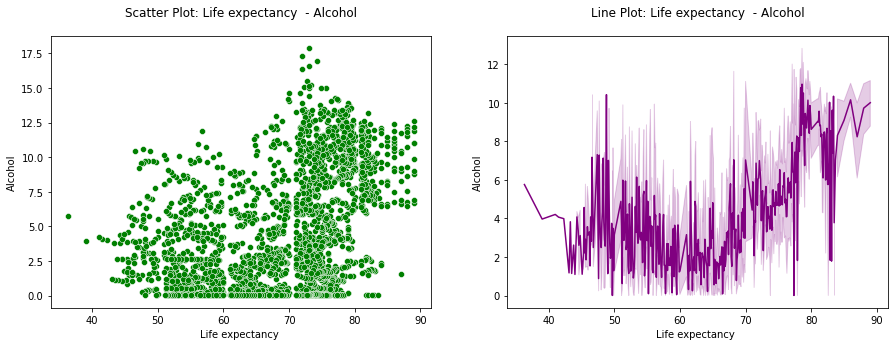

In [ ]:
# Life Expectancy Vs Alcohol
LineScatterPlots(numeric[1], numeric[4], hypothesis1)

The general trend from a life expectancy is an increase in life expectancy with alcohol use. Further analysis is required.

In [ ]:
# Correlation
Corr(numeric[1], numeric[4], hypothesis1)

Correlation Matrix : 
                  Life expectancy    Alcohol
Life expectancy           1.000000  0.399439
Alcohol                   0.399439  1.000000


Very weak positive correlation.

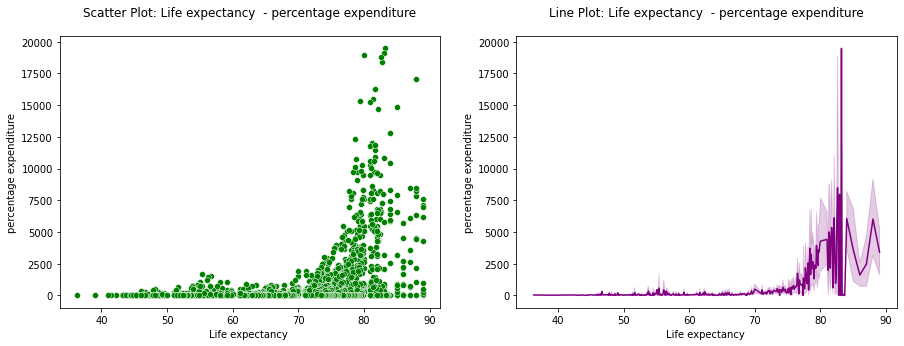

In [ ]:
# Life Expectancy Vs Alcohol
LineScatterPlots(numeric[1], numeric[5], hypothesis1)

Percentage expectancy seems to be related to life expectancy when the life expectancy is between 75 and 90.

In [ ]:
# Correlation
Corr(numeric[1], numeric[5], hypothesis1)

Correlation Matrix : 
                        Life expectancy   percentage expenditure
Life expectancy                   1.0000                  0.3831
percentage expenditure            0.3831                  1.0000


Weak postive correlation.

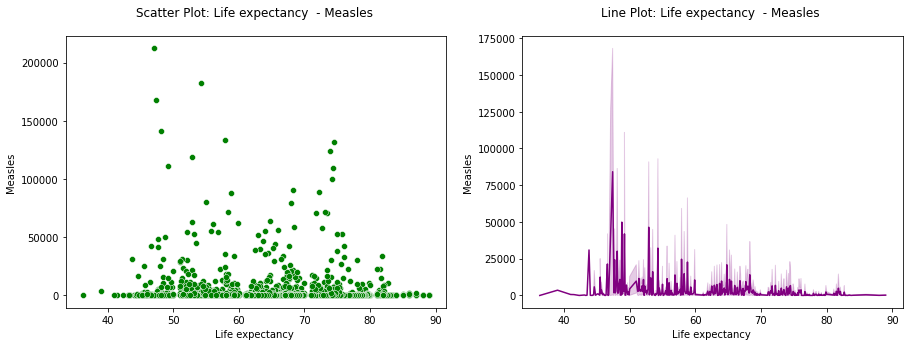

In [ ]:
# Life Expectancy Vs Alcohol
LineScatterPlots(numeric[1], numeric[6], hypothesis1)

Further analysis is required.

In [ ]:
# Correlation
Corr(numeric[1], numeric[6], hypothesis1)

Correlation Matrix : 
                  Life expectancy   Measles 
Life expectancy           1.000000 -0.152239
Measles                  -0.152239  1.000000


Weak positive corrrelation.

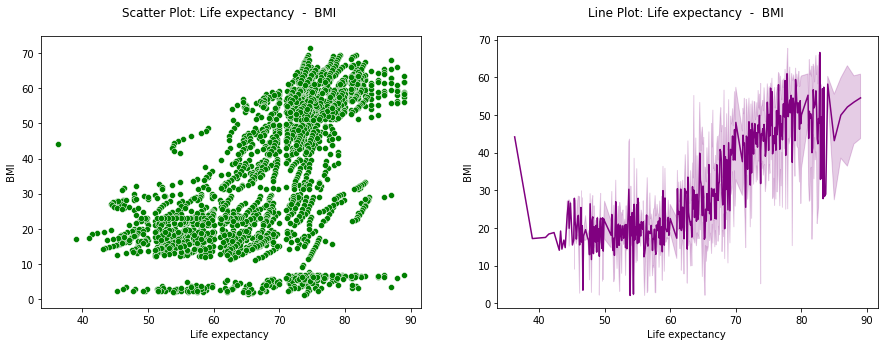

In [ ]:
# Life Expectancy Vs Alcohol
LineScatterPlots(numeric[1], numeric[7], hypothesis1)

There seems to be no relation between the two.

In [ ]:
# Correlation
Corr(numeric[1], numeric[7], hypothesis1)

Correlation Matrix : 
                  Life expectancy       BMI 
Life expectancy           1.000000  0.592548
 BMI                      0.592548  1.000000


Very weak negative correlation.

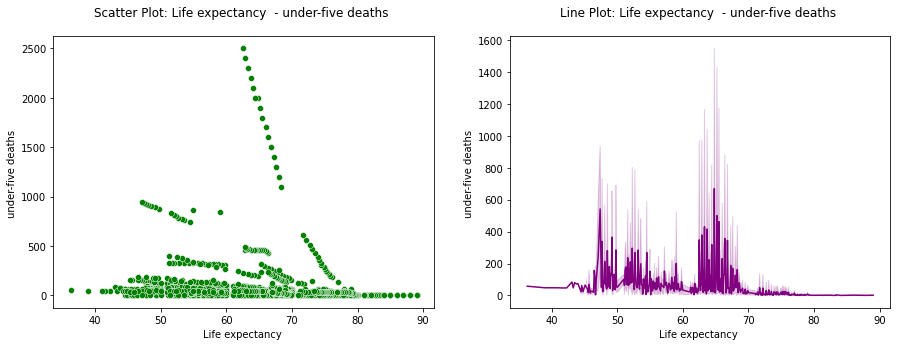

In [ ]:
# Life Expectancy Vs Alcohol
LineScatterPlots(numeric[1], numeric[8], hypothesis1)

Increase in BMI leads to an increase in life expectancy.

In [ ]:
# Correlation
Corr(numeric[1], numeric[8], hypothesis1)

Correlation Matrix : 
                    Life expectancy   under-five deaths 
Life expectancy              1.00000            -0.21999
under-five deaths           -0.21999             1.00000


Moderate correlation.

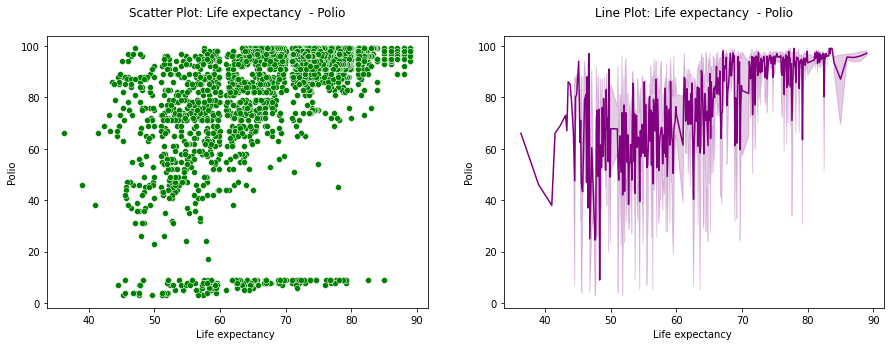

In [ ]:
# Life Expectancy Vs Alcohol
LineScatterPlots(numeric[1], numeric[9], hypothesis1)

In [ ]:
# Correlation
Corr(numeric[1], numeric[9], hypothesis1)

Correlation Matrix : 
                  Life expectancy      Polio
Life expectancy           1.000000  0.494256
Polio                     0.494256  1.000000


Weak egative correlation.

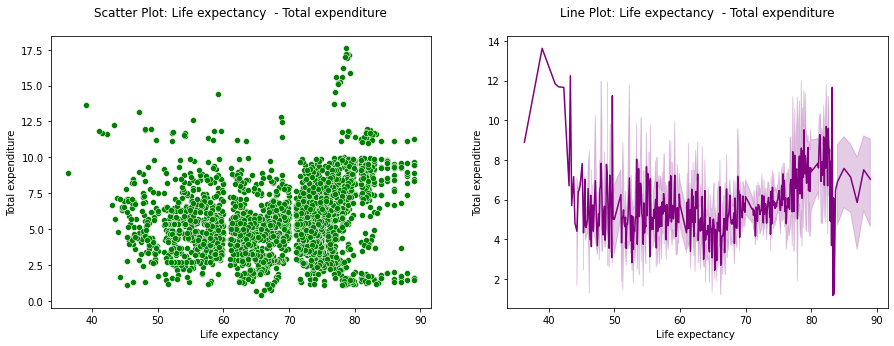

In [ ]:
# Life Expectancy Vs Alcohol
LineScatterPlots(numeric[1], numeric[10], hypothesis1)

In [ ]:
# Correlation
Corr(numeric[1], numeric[2], hypothesis1)

Correlation Matrix : 
                  Life expectancy   Adult Mortality
Life expectancy           1.000000        -0.701742
Adult Mortality          -0.701742         1.000000


Strong negative correlation.

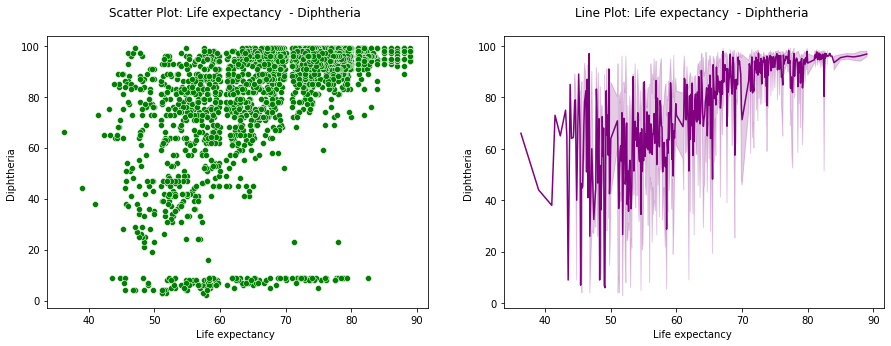

In [ ]:
# Life Expectancy Vs Alcohol
LineScatterPlots(numeric[1], numeric[11], hypothesis1)

In [ ]:
# Correlation
Corr(numeric[1], numeric[11], hypothesis1)

Correlation Matrix : 
                  Life expectancy   Diphtheria 
Life expectancy            1.00000      0.52095
Diphtheria                 0.52095      1.00000


Weak positive correlation.

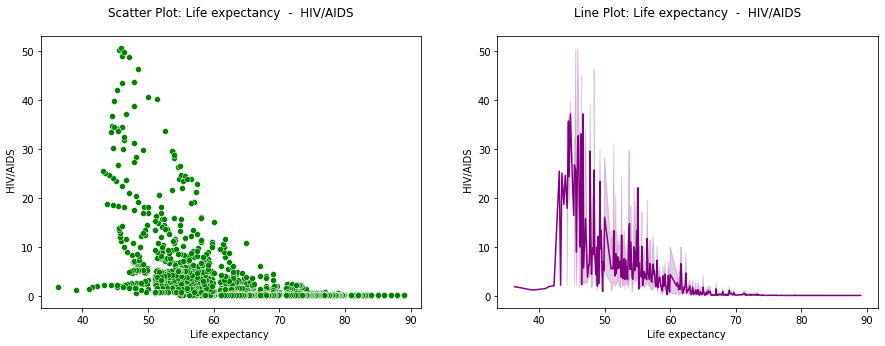

In [ ]:
# Life Expectancy Vs Alcohol
LineScatterPlots(numeric[1], numeric[12], hypothesis1)

In [ ]:
# Correlation
Corr(numeric[1], numeric[12], hypothesis1)

Correlation Matrix : 
                  Life expectancy    HIV/AIDS
Life expectancy           1.000000  -0.559369
 HIV/AIDS                -0.559369   1.000000


Moderate positive correlation.

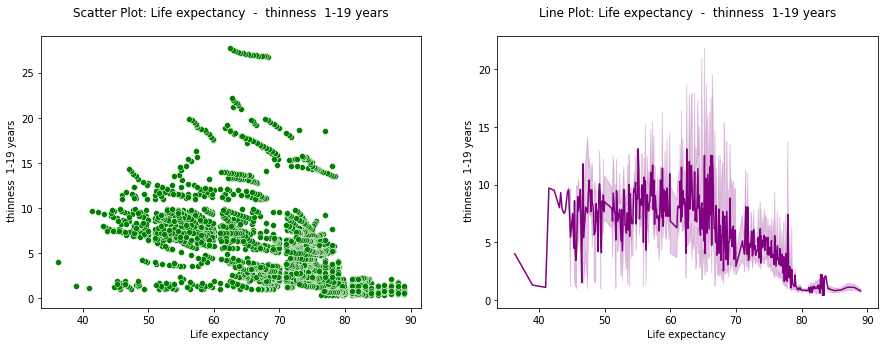

In [ ]:
# Life Expectancy Vs Alcohol
LineScatterPlots(numeric[1], numeric[13], hypothesis1)

In [ ]:
# Correlation
Corr(numeric[1], numeric[13], hypothesis1)

Correlation Matrix : 
                       Life expectancy    thinness  1-19 years
Life expectancy                1.000000              -0.474239
 thinness  1-19 years         -0.474239               1.000000


Moderate negative correlation.

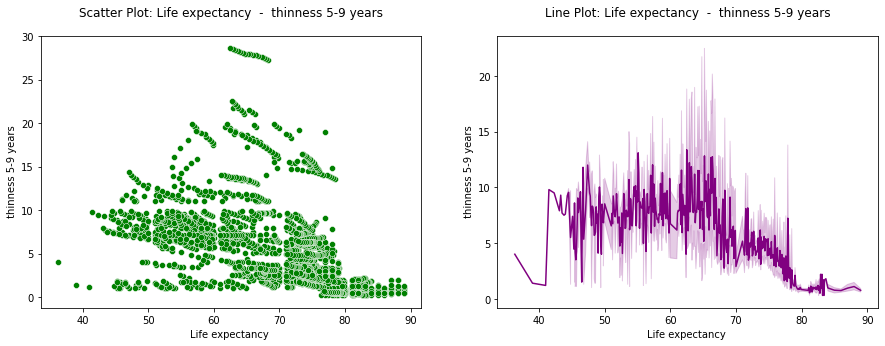

In [ ]:
# Life Expectancy Vs Alcohol
LineScatterPlots(numeric[1], numeric[14], hypothesis1)

Moderate positive correlation.

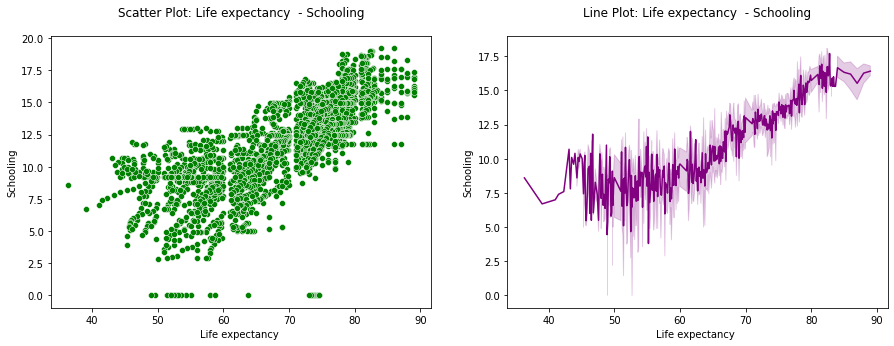

In [ ]:
# Life Expectancy Vs Alcohol
LineScatterPlots(numeric[1], numeric[16], hypothesis1)

In [ ]:
# Correlation
Corr(numeric[1], numeric[16], hypothesis1)

Correlation Matrix : 
                  Life expectancy   Schooling
Life expectancy           1.000000   0.748527
Schooling                 0.748527   1.000000


Moderate negative correlation.

### Numeric-Categorical

In [ ]:
# Bar plot function
def BarPlotBiv(x,y, data):
  fig, ax = plt.subplots(figsize = (8,5))
  sns.barplot(data[x], data[y], palette = 'flare')
  plt.title(f'{x} Distribution by {y}'
  , fontsize = 12, y = 1.05)
  plt.show()

**Life Expectancy**

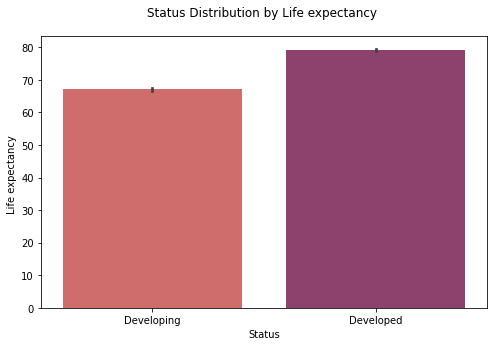

In [ ]:
# Life expectancy Vs Status
BarPlotBiv(categorical[1], numeric[1], expectancy)

As expected, developed countries have the highest life expectancy.

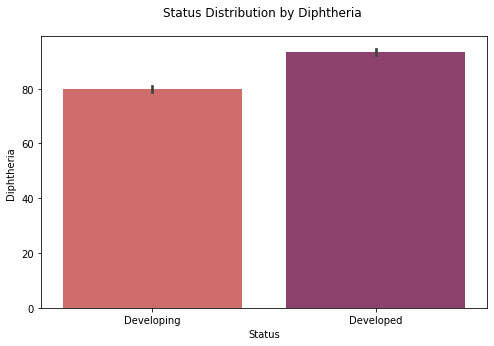

In [ ]:
# Life expectancy Vs Total Expenditure
BarPlotBiv(categorical[1], numeric[11], expectancy)

Developed countries have higher expenditure.

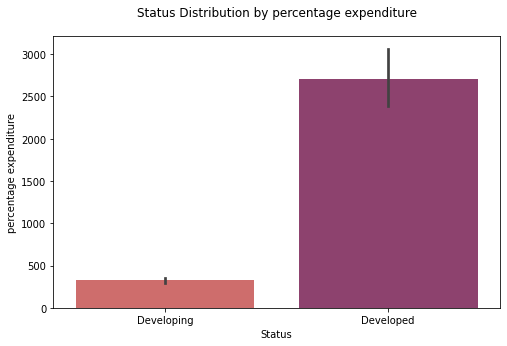

In [ ]:
# Life expectancy Vs Percentage Expenditure
BarPlotBiv(categorical[1], numeric[5], expectancy)

Developed countries have the highest percentage expenditure.

*1. BMI*

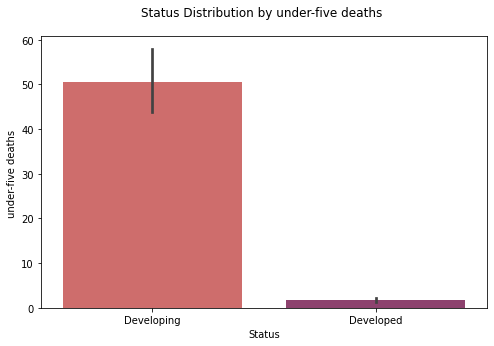

In [ ]:
# Life expectancy Vs BMI
BarPlotBiv(categorical[1], numeric[8], expectancy)

Peope in developed countries have higher BMI, as compared to those in developing countries.

*2. Alcohol Consumption*

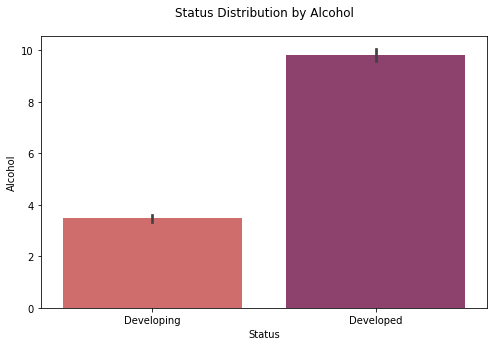

In [ ]:
# Life expectancy Vs Alcohol
BarPlotBiv(categorical[1], numeric[4], expectancy)

Developed countries have the highest alcohol consumption rates.

*3. Immunization*

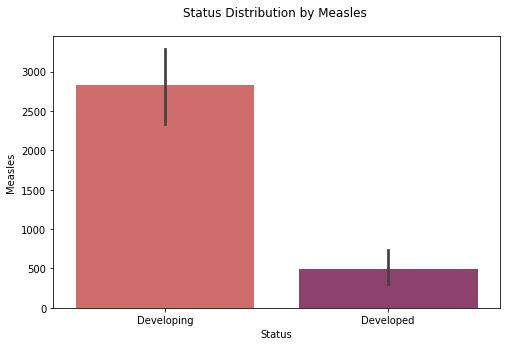

In [ ]:
# Life expectancy Vs Hepatitis B
BarPlotBiv(categorical[1], numeric[6], expectancy)

Developed countries have the highest Hepatitis B immunization rates.

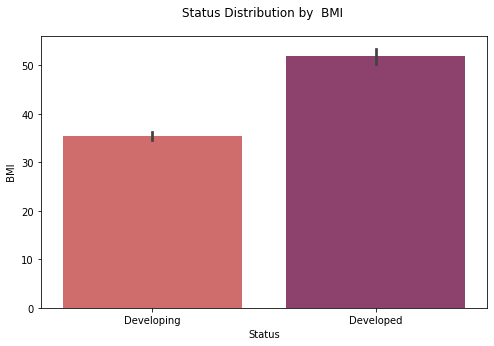

In [ ]:
# Life expectancy Vs Measles
BarPlotBiv(categorical[1], numeric[7], expectancy)

Developing countries have the highest Measles immunization rates.

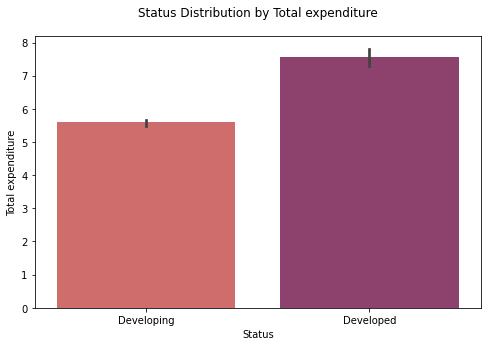

In [ ]:
# Life expectancy Vs Polio
BarPlotBiv(categorical[1], numeric[10], expectancy)

Unexpectedly, dveloping countries have a higher number of Polio immunization, in comparisson to developing countries.

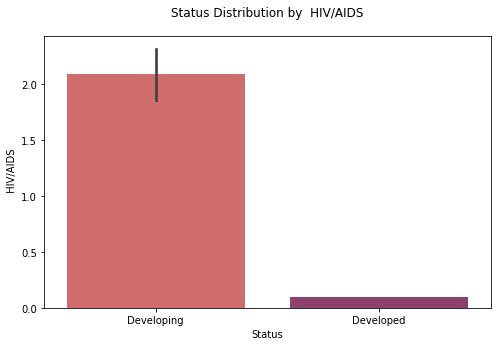

In [ ]:
# Life expectancy Vs Diptheria
BarPlotBiv(categorical[1], numeric[12], expectancy)

Developed countries have higher Diptheria immunization rates.

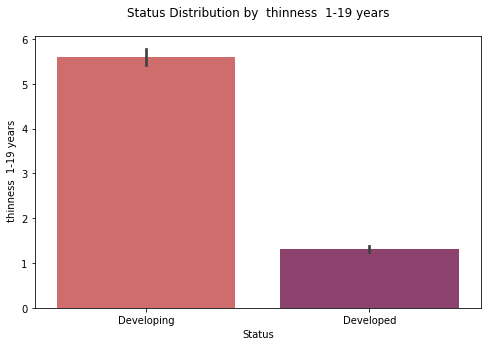

In [ ]:
# Life expectancy Vs HIV/AIDS
BarPlotBiv(categorical[1], numeric[13], expectancy)

HIV/AIDS has a very large number of HIV/AIDS cases. This could be due to limited knowledge on, or use of proper contraception.


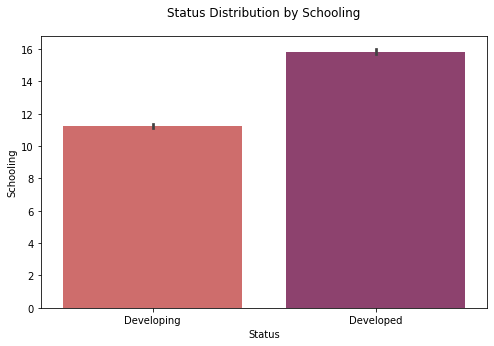

In [ ]:
# Life expectancy Vs Thinness 1-19 years
BarPlotBiv(categorical[1], numeric[16], expectancy)

Devoloping countries have a higher prevalence of thinness amoung children/teenagers. This could be due to malnutrition as a result of poverty.

**Mortality**

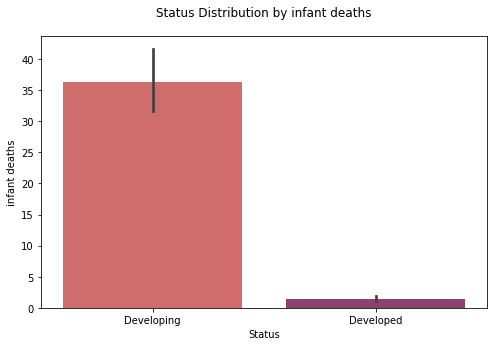

In [ ]:
# Life expectancy Vs Infant Deaths
BarPlotBiv(categorical[1], numeric[3], expectancy)

Devoloping countries have a very high number of infant deaths, this could be due to difficulty in accessing, or getting medical attention.

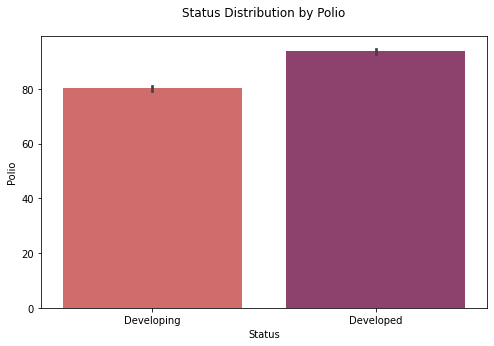

In [ ]:
# Life expectancy Vs Infant Deaths
BarPlotBiv(categorical[1], numeric[9], expectancy)

Developing countries have the highest number of deaths in toddlers.

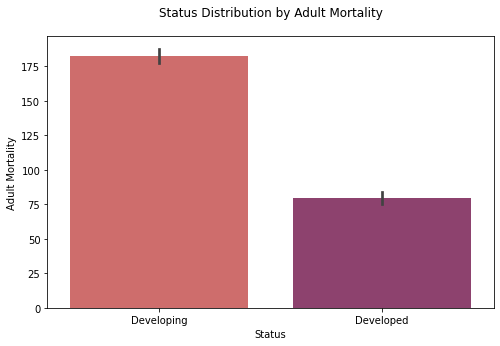

In [ ]:
# Life expectancy Vs Adult Mortality
BarPlotBiv(categorical[1], numeric[2], expectancy)

Developing countries have the highest adult mortality.

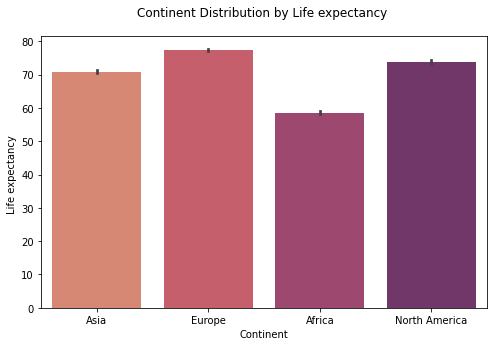

In [ ]:
# Continent Vs Life Expectancy
BarPlotBiv('Continent',numeric[1], hypothesis1)

Europe has the highets life expectancy, followed by North and South America, then Oceania.

### Hypothesis Testing

**i) Hypotheses:**

a) North America Vs Europe
1. **Null**: North America and Europe have the same mean/median life expectancy.
2. **Alternate**: North America and Europe do not have the same mean/median life expectancy.

b) East Africa West, South and North Africa
1. **Null**: East Africa and West/South/North have the same mean/median life expectancy.
2. **Alternate**: East Africa and West/South/North do not have the same mean/median life expectancy

**ii) Acceptance criteria and test sensitivity:**

Significance level = 0.05

This significance level will ensure a fair trade off between the Type 1 and Type 2 error, as the probablility of getting type 2 errors decreases with increase in the significance level, but this leads to an increase in the probability of getting a type 1 error.

**iii) Hypothesis Test**

*1. Parametric Test*

In [ ]:
# Normality test
# Visual test function

from scipy import stats
def NormalityTest(data1, data2, column): 

  # Length equalization to prevent broadcast errors

  # Checking sample lengths
  one = len(data1)
  two = len(data2)
  
  # Equalize length
  if one > two:
    data1 = data1.iloc[range(two)]
  elif one < two:
    data2 = data2.iloc[range(one)]
  else:
    pass

  # Residuals 
  diff = data1.values - data2.values  

  # Probalility plot 
  stats.probplot(diff, plot= plt)
  plt.title(f'{column} P-P Plot') 
  plt.show()

  # Histogram 
  diff = pd.Series(diff)
  title = f'{column} Residuals'
  diff.plot(kind= "hist", title= title)
  plt.xlabel(column) 
  plt.show()

  # Shapiro Normality Test
  test_statistic, p_value = stats.shapiro(diff)
  print(f"Test statistic = {test_statistic}")
  print(f"P-Value = {p_value}")

The sample has n > 30. Therefore, only the independent Z-test will be considered.

**Independent Z-Test**

Conditions:
* The sample size is greater than 30. 
* Data points should be independent from each other. 
* Normal distribution of data.
* Random selection of data.
* Equal sample sizes.

In [ ]:
# Z-Test Function
def ZTest(data1, data2):

  # Length Equalization
  one = len(data1)
  two = len(data2)
  
  # Equalize length
  if one > two:
    data1 = data1.iloc[range(two)]
  elif one < two:
    data2 = data2.iloc[range(one)]
  else:
    pass

  # Z-Test
  test_statistic, p_value = ztest(data1, data2, value = 0)
  print(f'Test Statistic = {test_statistic} \nP-Value = {p_value}')

**Europe Vs North America**

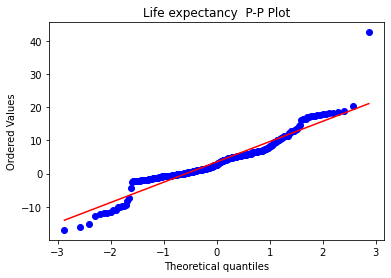

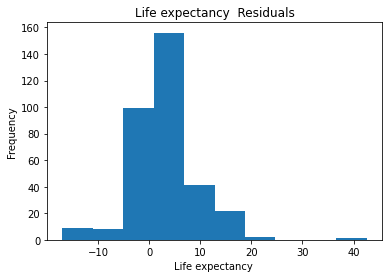

Test statistic = 0.9200581312179565
P-Value = 1.9193316640880864e-12


In [ ]:
# Independent Samples
europe = hypothesis1[hypothesis1['Continent'] == 'Europe']['Life expectancy ']
north_america = hypothesis1[hypothesis1['Continent'] == 'North America']['Life expectancy ']

# Normality Test
NormalityTest(europe, north_america, numeric[1])

The p-value is less than 0.05, therefore, there is sufficient evidence to reject the null hypothesis if normality.

*2. Non-Parametric Test*

**a) Mann Whitney U Test**

**Null Hypotheisis:**  the distribution underlying sample x is the same as the distribution underlying sample y.

Conditions:
* The dependent variable should be measured on an ordinal scale or a continuous scale.
* The independent variable should be two independent, categorical groups.
* Observations should be independent. 
* Observations are not normally distributed. However, they should follow the same shape (i.e. both are bell-shaped and skewed left).

In [ ]:
# Hypothesis Test
def mannwhitney(data1, data2):
  one = len(data1)
  two = len(data2)

  # Equalize length
  if one > two:
    data1 = data1.iloc[range(two)]
  elif one < two:
    data2 = data2.iloc[range(one)]
  else:
    pass

  # Mann Whitney U Test
  return stats.mannwhitneyu(data1, data2)

**b) Mood Median Test**

**Null hypothesis:** two or more samples come from populations with the same median.

* Data should include only one categorical factor.
* The dependent variable is continuous or discrete-count, and the independent variables are discrete with two or more attributes.
* Sample data need not be normally distributed.
* Sample sizes can be unequal too.

In [ ]:
# Hypothesis Test
def moodmedian(data1, data2):
  one = len(data1)
  two = len(data2)

  # Equalize length
  if one > two:
    data1 = data1.iloc[range(two)]
  elif one < two:
    data2 = data2.iloc[range(one)]
  else:
    pass

  # Mood Median Test
  test_statistic, p_value, grand_median, cont_table = stats.median_test(data1, data2)
  print(f'test_statistic = {test_statistic}\np_value = {p_value}\ngrand_median = {grand_median}\ncont_table = \n{cont_table}')

**Europe Vs North America**

In [ ]:
mannwhitney(europe, north_america)

MannwhitneyuResult(statistic=33490.5, pvalue=6.4729136969724515e-21)

From the Mann Whitney U test, the p-value < 0.05, therefore, there is sufficient evidence to reject the null hypothesis of similar distribution of the life expectancy variable. 

In [ ]:
moodmedian(europe, north_america)

test_statistic = 59.17211557819735
p_value = 1.444665541700793e-14
grand_median = 75.2
cont_table = 
[[219 118]
 [119 220]]


The result is confirmed by the Mood Median test as the p-value < 0.05, therefore, there is sufficient evidence to reject the null hypothesis of equal life expectancy median.

**African Regions**

In [ ]:
# African regions lists
north = 'Algeria, Egypt, Libya, Morocco, Sudan, Tunisia, Western Sahara'
west = 'Benin, Burkina Faso, Cabo Verde, The Gambia, Ghana, Guinea, Guinea-Bissau, Ivory Coast, Liberia, Mali, Mauritania, Niger, Nigeria, Senegal, Sierra Leone,Togo'
central = ' Angola, Burundi, Cameroon, the Central African Republic, Chad, the Democratic Republic of the Congo, the Republic of the Congo, Equatorial Guinea, Gabon, Rwanda, Sao Tome and Principe'
east = 'Tanzania, Kenya, Uganda, Rwanda, Burundi, South Sudan, Djibouti, Eritrea, Ethiopia, Somalia, Comoros, Mauritius, Seychelles, Mozambique, Madagascar, Malawi'
south = 'Angola, Botswana, Lesotho, Mozambique, Namibia, South Africa, Swaziland, Zambia, Zimbabwe'

# List of regions
regions = [north, west, central, east, south]

# Convert strings to list
def ToList(regions):
  for region in regions:
    region = region.split(',')

In [ ]:
# Function call
ToList(regions)

# Checking changes
regions[0]

'Algeria, Egypt, Libya, Morocco, Sudan, Tunisia, Western Sahara'

In [ ]:
# Dataset copy to incorporate regions
africa = hypothesis1[hypothesis1['Continent'] == 'Africa']

# Adding an empty region column
africa['Region'] = ''

# Region Names
names = ['North', 'West', 'Central', 'East', 'South']
# Function call
Continents(regions, 'Country', 'Region', names, africa)

In [ ]:
# Confirming changes
africa['Region'].unique()

array(['North', 'South', 'West', 'East', '', 'Central'], dtype=object)

In [ ]:
# Target samples
north = africa[africa['Region'] == 'North'][numeric[1]]
west = africa[africa['Region'] == 'West'][numeric[1]]
central = africa[africa['Region'] == 'Central'][numeric[1]]
east= africa[africa['Region'] == 'East'][numeric[1]]
south = africa[africa['Region'] == 'South'][numeric[1]]

**1. East Africa Vs West Africa**

*Parametric test*

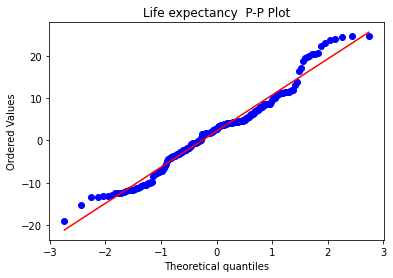

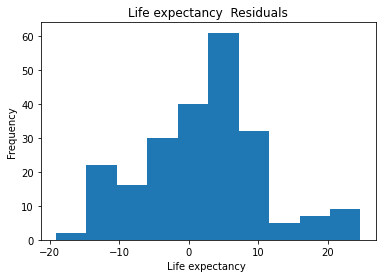

Test statistic = 0.9737257361412048
P-Value = 0.00034959096228703856


In [ ]:
# Test for East and West Africa
# Normality Test
NormalityTest(east, west, numeric[1])

The p-value > 0.05, therefore, there isn't enough evidence to reject the null hypothesis of normal distribution.

As the sample size > 30, independent z-test will be implememted.

In [ ]:
# Function Call
ZTest(east, west)

Test Statistic = 3.3855121175987537 
P-Value = 0.0007104557269729461


The p-value > 0.05, therefore, there isn't sufficient evidence to reject the null hypothesis of equal mean life expectancy between East and West Africa.

**2. East Africa Vs North Africa**

*Parametric Test*

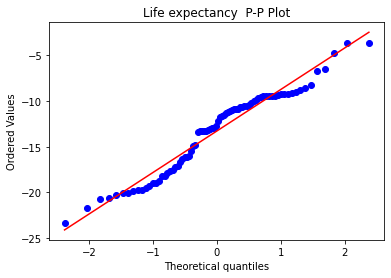

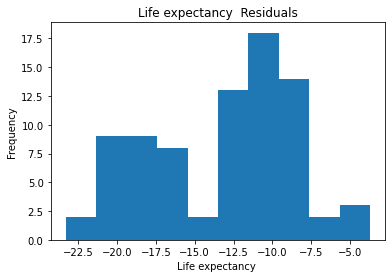

Test statistic = 0.9551237225532532
P-Value = 0.006849807221442461


In [ ]:
# Normality Test
NormalityTest(east, north, numeric[1])

* The P-Value > 0.05, therefore, there isn't suffucient evidence to reject the null hypothesis of normal distribution.
* Therefore, the independent z-test will be implemented.

In [ ]:
# Function call
ZTest(east,north)

Test Statistic = -24.261527211912508 
P-Value = 4.996990482732098e-130


The p-value << 0.05, therefore, there is sufficient evidence to reject the null hypothesis of equal mean life expectancy in East and North Africa.

**3. East Vs Cental Africa**

*Parametric Test*

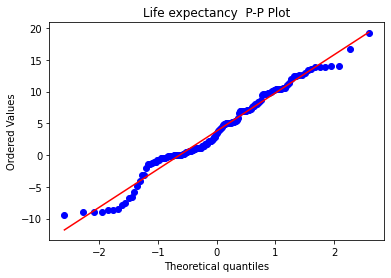

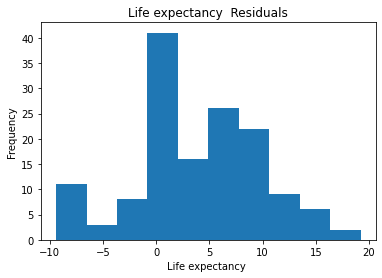

Test statistic = 0.9784954190254211
P-Value = 0.0229799821972847


In [ ]:
# Normality Test
NormalityTest(east, central, numeric[1])

* The p-value < 0.05, therefore, there is sufficient evidence to reject the null hypothesis of a normal distribution.
* Non-parametric hypothesis testing will be carried out.

*Non-Parametric*

**Mann Whitney U Test**

In [ ]:
# Function call
mannwhitney(east, central)

MannwhitneyuResult(statistic=6938.0, pvalue=6.07494725662674e-07)

The p-value < 0.05, therefore, there is sufficient evidence to reject the null hypothesis of similar distribution between the life expectancy variables of East and North Africa.

In [ ]:
moodmedian(east, central)

test_statistic = 24.51063829787234
p_value = 7.390068008379015e-07
grand_median = 58.1
cont_table = 
[[92 49]
 [52 95]]


The p-value > 0.05, therefore, there is insifficient evidence to reject the null hypotheis of equal median life expectancy.

**4. East Vs South**

*Parametic Test*

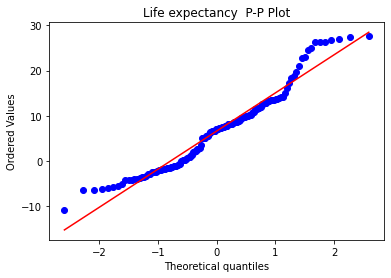

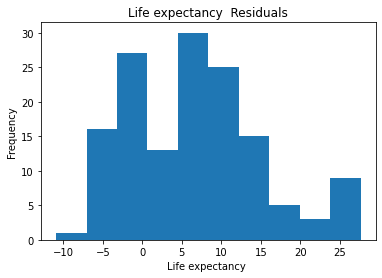

Test statistic = 0.9551688432693481
P-Value = 0.0001272626395802945


In [ ]:
# Normality Test
NormalityTest(east, south, numeric[1])

* The p-value < 0.05, therefore there is sufficient evidence to reject the null hypothesis of normal distribution.
* Therefore, non-parametric testing will be carried out.

*Non-Parametric*

**Mann Whitney U Test**

In [ ]:
# Function call
mannwhitney(east, south)

MannwhitneyuResult(statistic=4895.5, pvalue=4.830738233450351e-15)

The p-value << 0.05, therefore, there is sufficient evidence to reject the null hypothesis of similar distribution of the life expectancy variable for East and Southern Africa.

**Mood Median**

In [ ]:
# Function call
moodmedian(east, south)

test_statistic = 55.125
p_value = 1.1310313266887142e-13
grand_median = 57.349999999999994
cont_table = 
[[104  40]
 [ 40 104]]


The p-value << 0.05, therefore, there is sufficient evidence to reject the null hypothesis of equal life expectancy median between East and Southern Africa.

## Multivariate Analysis

**1. Label Encoding**

In [ ]:
# Categorical columns
cat = list(hypothesis1.select_dtypes(include = 'object').columns)
cat

['Country', 'Status', 'Continent']

In [ ]:
# Creating a duplicate dataset
target = hypothesis1.copy()
# Converting categorical columns to numerical columns
label_encoder = preprocessing.LabelEncoder()
# Encoding columns
target[cat]= target[cat].apply(label_encoder.fit_transform)
target.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Continent
0,0,2015,1,65.0,263.0,62,0.01,71.279624,1154,19.1,83,6.0,8.16,65.0,0.1,17.2,17.3,0.479,10.1,1
1,0,2014,1,59.9,271.0,64,0.01,73.523582,492,18.6,86,58.0,8.18,62.0,0.1,17.5,17.5,0.476,10.0,1
2,0,2013,1,59.9,268.0,66,0.01,73.219243,430,18.1,89,62.0,8.13,64.0,0.1,17.7,17.7,0.470,9.9,1
3,0,2012,1,59.5,272.0,69,0.01,78.184215,2787,17.6,93,67.0,8.52,67.0,0.1,17.9,18.0,0.463,9.8,1
4,0,2011,1,59.2,275.0,71,0.01,7.097109,3013,17.2,97,68.0,7.87,68.0,0.1,18.2,18.2,0.454,9.5,1


**2. Train-Test-Split**

In [ ]:
# Splitting data into the training and testing set
X_train = target.loc[target['Year'] < 2014].drop(numeric[1], axis = 1)
X_test = target.loc[target['Year'] >= 2014].drop(numeric[1], axis = 1)
y_train = target.loc[target['Year'] < 2014, numeric[1]]
y_test = target.loc[target['Year'] >= 2014, numeric[1]]


# Dataset shapes
print(f'X-train = {len(X_train)}')
print(f'X-test = {len(X_test)}')
print(f'y-train = {len(y_train)}')
print(f'y-test = {len(y_test)}')

X-train = 2258
X-test = 322
y-train = 2258
y-test = 322


**3. Normalization**

In [ ]:
# Numeric columns
numeric2 = numeric.copy()
numeric2.remove('Life expectancy ')

In [ ]:
# Only scaling the numerical columns
sc = StandardScaler()
X_train[numeric2] = sc.fit_transform(X_train[numeric2])
X_test[numeric2] = sc.transform(X_test[numeric2])

**4. Dimensionality Reduction**

**LDA**

LDA cannot be used as it requires an underlying Gaussian distribution [Link](https://machinelearningmastery.com/linear-discriminant-analysis-for-machine-learning/)

In [ ]:
# LDA Function
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Performing LDA on the dataset with dropped Nan values
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)
# Training and testing the model
model = RandomForestRegressor(max_depth=2, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Scores
scores = {"MAE": mean_absolute_error(ytest, ypred),
          "RMSLE": mean_squared_log_error(ytest, ypred),
          "Valid R^2": r2_score(ytest, ypred)}
print(f'Scores: \n{scores}\n')

# Comparison
predictions = pd.DataFrame(data={"actual values": ytest, 
                  "predictions": ypred})

print(predictions.head())

ValueError: ignored

**PCA**

In [ ]:
# Function used to test the accuracy when different number of principle 
# components are used.
def TrainEvaluate(components, xtrain, xtest, ytrain, ytest):
  # Selecting the number of components components
  pca = PCA(n_components= components)
  train = pca.fit_transform(xtrain)
  test = pca.transform(xtest)

  # Explained varianced ratio 
  explained_variance = pca.explained_variance_ratio_

  # Scree plot
  pc_values = np.arange(pca.n_components_) + 1
  plt.plot(pc_values, explained_variance, 'o-', linewidth=2, color='green')
  plt.title('Scree Plot')
  plt.xlabel('Principal Component')
  plt.ylabel('Variance Explained')
  plt.show()

  # Model training
  model = RandomForestRegressor(max_depth=2, random_state=0)
  model.fit(xtrain, ytrain)

  # Prediction
  ypred = model.predict(xtest)

  # Scores
  scores = {'MAE': mean_absolute_error(ytest, ypred),
            'MSE': mean_squared_error(ytest, ypred),
            'RMSE': mean_squared_error(ytest, ypred, squared = False),
            'R^2': r2_score(ytest, ypred)}
  print(f'Scores: \n{scores}\n')

  # Comparison
  predictions = pd.DataFrame(data={"actual values": ytest, 
                   "predictions": ypred})
  # Comparisson table
  print(predictions.head(), '\n')

  




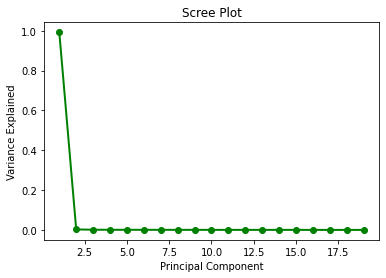

Scores: 
{'MAE': 3.0915571134821764, 'MSE': 17.840128735623487, 'RMSE': 4.223757655882199, 'R^2': 0.760404484529551}

    actual values  predictions
0            65.0    66.874362
1            59.9    66.874362
16           77.8    75.066945
17           77.5    75.066945
32           75.6    74.529234 



In [ ]:
# When all components are used
TrainEvaluate(None, X_train, X_test, y_train, y_test)

* The predicted value varies from the true value by 3.5525 (MAE).
* From the r^2 score = 0.7456, therefore, 70% of the data fit the regression model.

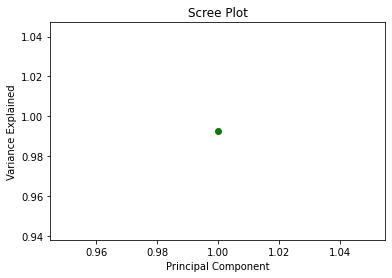

Scores: 
{'MAE': 3.0915571134821764, 'MSE': 17.840128735623487, 'RMSE': 4.223757655882199, 'R^2': 0.760404484529551}

    actual values  predictions
0            65.0    66.874362
1            59.9    66.874362
16           77.8    75.066945
17           77.5    75.066945
32           75.6    74.529234 



In [ ]:
# When one components are used
TrainEvaluate(1, X_train, X_test, y_train, y_test)

* The predicted value varies from the true value by 3.5525 (MAE).
* From the r^2 score = 0.7456, therefore, 70% of the data fit the regression model.

One principle component accounts for most of the variation.

**Feature importance and selection**

In [ ]:
# Random Forest Regressor

model = RandomForestRegressor(random_state = 1, max_depth = 10)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=1)

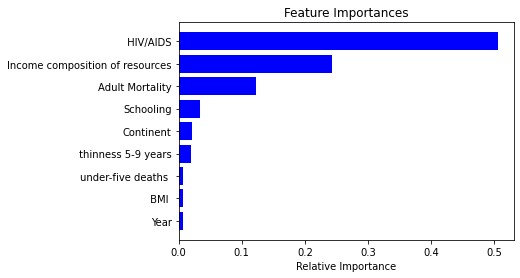

In [ ]:
# Feature Importance Graph
features = X_train.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-9:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

The income, HIV/AIDS and adult mortality columns have the highest weighted importance.

In [ ]:
# Selecting features based on the importance of their weights
selector = SelectFromModel(model)
selected = selector.fit_transform(X_train, y_train)
selected.shape

(2258, 3)

In [ ]:
# Mask of selected features
status = selector.get_support()
print("Selection status: ", status) 

# Selected features
features = selector.get_feature_names_out()
print('\n', features)

Selection status:  [False False False  True False False False False False False False False
 False  True False False  True False False]

 ['Adult Mortality' ' HIV/AIDS' 'Income composition of resources']


In [ ]:
# Training set
X_train = pd.DataFrame(selected, columns = selector.get_feature_names_out())
# Preview
X_train.head()

,Adult Mortality,HIV/AIDS,Income composition of resources
0,0.736402,-0.354496,-0.672794
1,0.766675,-0.354496,-0.705332
2,0.789379,-0.354496,-0.747167
3,0.819652,-0.354496,-0.775057
4,0.834788,-0.354496,-0.840133


In [ ]:
# Testing set
X_test = X_test.loc[:, features]
# Preview
X_test.head()

,Adult Mortality,HIV/AIDS,Income composition of resources
0,0.698561,-0.354496,-0.630959
1,0.759107,-0.354496,-0.644904
16,-0.731822,-0.354496,0.684508
17,-1.231320,-0.354496,0.679860
32,-1.148071,-0.354496,0.596191


In [ ]:
# Model function
def Regression(xtrain, xtest, ytrain, ytest):
  # Model training
  model = RandomForestRegressor(max_depth=2, random_state=0)
  model.fit(xtrain, ytrain)

  # Prediction
  ypred = model.predict(xtest)

  # Scores
  scores = {'MAE': mean_absolute_error(ytest, ypred),
            'MSE': mean_squared_error(ytest, ypred),
            'RMSE': mean_squared_error(ytest, ypred, squared = False),
            'R^2': r2_score(ytest, ypred)}
  print(f'Scores: \n{scores}\n')

  # Comparison
  predictions = pd.DataFrame(data={"actual values": ytest, 
                    "predictions": ypred})
  # Comparisson table
  print(predictions.head(), '\n')


In [ ]:
# Checking performance
Regression( X_train, X_test, y_train, y_test)

Scores: 
{'MAE': 3.0837219259694417, 'MSE': 17.857393632046957, 'RMSE': 4.225800945625214, 'R^2': 0.7601726144674328}

    actual values  predictions
0            65.0    67.103054
1            59.9    67.103054
16           77.8    74.569943
17           77.5    74.569943
32           75.6    74.569943 



* MAE has reduced, however, the r^2 has decreased slightly.

In [ ]:
# Hypaparameter tuning using randimized search

# Hyperparameters to be tested
grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

# Regression model
model = RandomForestRegressor()
rs_model = RandomizedSearchCV(estimator = model,
                            param_distributions=grid,
                            n_iter=100, # try 20 models total
                            cv=5, # 5-fold cross-validation
                            verbose=2) # print out results

rs_model.fit(X_train, y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   6.9s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   5.7s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   5.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   5.4s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1200; total time=   5.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6,

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [ ]:
# Best parameters
parameters = rs_model.best_params_
parameters

{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 1200}

In [ ]:
# Model function
def Regression(xtrain, xtest, ytrain, ytest):
  # Model training
  model = RandomForestRegressor(max_depth= 10,
 max_features= 'sqrt',
 min_samples_leaf = 1,
 min_samples_split = 4,
 n_estimators = 1200)
  model.fit(xtrain, ytrain)

  # Prediction
  ypred = model.predict(xtest)

  # Scores
  scores = {'MAE': mean_absolute_error(ytest, ypred),
            'MSE': mean_squared_error(ytest, ypred),
            'RMSE': mean_squared_error(ytest, ypred, squared = False),
            'R^2': r2_score(ytest, ypred)}
  print(f'Scores: \n{scores}\n')

  # Comparison
  predictions = pd.DataFrame(data={"actual values": ytest, 
                    "predictions": ypred})
  # Comparisson table
  print(predictions.head(), '\n')

  # Plot of actual values vs predictions
  fig, ax = plt.subplots()
  x = np.arange(0, len(predictions), 1)
  ax.scatter(x, predictions["actual values"], c='b', label="Acutual Values",alpha = 0.6)
  ax.scatter(x, predictions["predictions"], c='r', label="Predictions",alpha = 0.6)
  ax.legend(loc=(1, 0.5))
  ax.set_title('Actual Vs Predicted Values', y= 1.05)
  ax.set_ylabel('Y')
  ax.set_xlabel('X')

Scores: 
{'MAE': 1.6194116566496057, 'MSE': 5.127450844408695, 'RMSE': 2.264387520811907, 'R^2': 0.9311375917561417}

    actual values  predictions
0            65.0    62.333886
1            59.9    60.274460
16           77.8    77.552399
17           77.5    75.362076
32           75.6    74.706724 



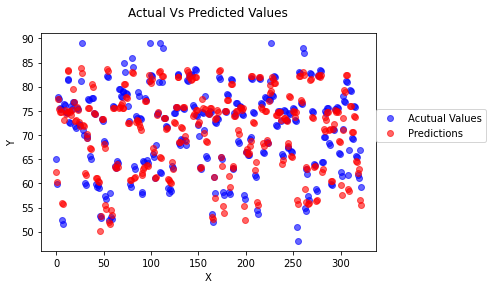

In [ ]:
# Checking performance
Regression( X_train, X_test, y_train, y_test)

* The MAE has been lowered by two units, therefore, the predicted value has a difference of 1.6182 from the predicted value.
* Furthermore, the fit of the data on the model has improved from 76% to 93%.